# Математическая статистика

Статистику любят спрашивать на собеседованиях и она убедительно выглядит в отчетах.

Также используется "под капотом" многих моделей машинного обучения.

Напрямую со статистикой работают далеко не во всех задачах.

"Существуют три вида лжи: ложь, наглая ложь и статистика" - Марк Твен

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Основные определения 

- **Генеральная совокупность** – общая группа объектов, которые исследуются.
- **Выборка** $X_{1},\ldots ,X_{n}$ – часть генеральной совокупности, доступная для исследования. Статистики стремятся к тому, чтобы результаты, полученные на выборках, были верны и для генеральной совокупности.
- **Связанные выборки** – ситуация, при которой любому объекту из первой выборки соответствует ровно один объект из второй. Можно сказать, что они образуют неразрывную пару (а в более сложных случаях – тройку, четверку и т. д.). Например, пациент до и после приема лекарства.
- **Наблюдение** – измеренный объект.
- **Переменные\признаки** – свойства объектов, которые поддаются измерению.
- **Значение переменной** – степень выраженности того или иного свойства у конкретного объекта.
- **Мода ($mode$)** – наиболее часто встречающееся значение.Чтобы вычислить моду, необходимо найти число, которое встречается наиболее часто.
- **Медиана ($median$)** – середина упорядоченного ряда значений. При нечетном количестве элементов $n, \qquad median(X)=X_{\frac{n+1}{2}}$, при четном количестве элементов - $median(X)=\frac{X_{n/2} + X_{n/2+1}}{2}$
- **Среднее арифметическое ($mean$)** – сумма значений, деленная на их количество. $\bar{X}=\frac{1}{n}\sum_{i=1}^n X_i$. Не путать с **математическим ожиданием ($E[X]$)** (формула расчета идентичная), считается для генеральной совокупности.
- **Размах ($R$)** – разность между максимальным и минимальным значениями. $max(X)-min(X)$
- **Межквартильный размах ($IQR$)**- это альтернативная мера разброса, которая слабее
подвержена влиянию крайних значений, чем размах. $IQR=X_{.75}-X_{.25}$
- **Отклонение ($\bar{X}-X$)** – это разность между средним арифметическим и конкретным значением.
- **Дисперсия** – измеряет разброс данных, сумма квадратов отклонений, деленная на их количество. Дисперсии для генеральной совокупности и для выборки вычисляются по разным формулам. Дисперсия генеральной совокупности ($D[X], Var(X),\sigma^2,\sigma_X^2$) $D[X]=E[(X-E[X])^2]$. Для выборки - **выборочная дисперсия** $S_n^2$ имеет аналогичную формулу расчета как у генеральной.
- **Стандартное отклонение** ($\sigma,std$)– корень из дисперсии.

## Закон больших чисел
Один из основных законов, который связывает теорию вероятностей и статистику

In [2]:
mu = 10
for n in [2, 10, 100, 1000, 100000]:
    mean = np.random.normal(mu, 10, size=n).mean()
    print(f'n={n} mu={mu:.2f}, mean={mean:.2f}, error={10-mean:.2f}')

n=2 mu=10.00, mean=11.39, error=-1.39
n=10 mu=10.00, mean=4.54, error=5.46
n=100 mu=10.00, mean=10.02, error=-0.02
n=1000 mu=10.00, mean=9.99, error=0.01
n=100000 mu=10.00, mean=10.02, error=-0.02


С ростом размера выборки, ее среднее будет стремиться к матожиданию.

Закон больших чисел интуитивно понятен. Именно поэтому мы считаем, что сбор большего количества данных приведет к более репрезентативной выборке наблюдений из области Теорема подтверждает эту интуицию.

## ЦПТ (Центральная предельная теорема)

Сгенерируем из равномреного распределения от 0 до 1 несколько значений

(array([504., 463., 468., 499., 543., 502., 512., 513., 501., 495.]),
 array([2.46591823e-04, 1.00219248e-01, 2.00191904e-01, 3.00164560e-01,
        4.00137216e-01, 5.00109872e-01, 6.00082529e-01, 7.00055185e-01,
        8.00027841e-01, 9.00000497e-01, 9.99973153e-01]),
 <BarContainer object of 10 artists>)

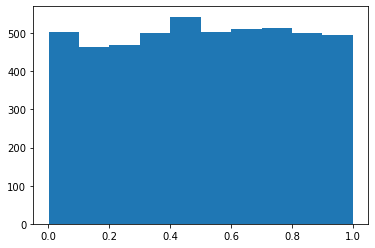

In [3]:
uniform_dist = np.random.uniform(0, 1, size=5000)
plt.hist(uniform_dist)

Сгенерируем большое количество выборок из этого распределения, возьмем для каждой из них среднее и из средних построим гистограмму.

Какое распределение напоминает?

**Теорема утверждает**, что с увеличением размера выборки распределение среднего значения по нескольким выборкам будет приближаться к стандартному нормальному распределению.

(array([ 12.,  46.,  66.,  76., 101., 124., 150., 148., 205., 222., 232.,
        230., 288., 305., 331., 303., 246., 288., 256., 208., 214., 186.,
        158., 153., 141.,  98.,  90.,  58.,  40.,  25.]),
 array([0.01079033, 0.04324887, 0.0757074 , 0.10816594, 0.14062447,
        0.17308301, 0.20554154, 0.23800008, 0.27045861, 0.30291715,
        0.33537569, 0.36783422, 0.40029276, 0.43275129, 0.46520983,
        0.49766836, 0.5301269 , 0.56258543, 0.59504397, 0.62750251,
        0.65996104, 0.69241958, 0.72487811, 0.75733665, 0.78979518,
        0.82225372, 0.85471225, 0.88717079, 0.91962932, 0.95208786,
        0.9845464 ]),
 <BarContainer object of 30 artists>)

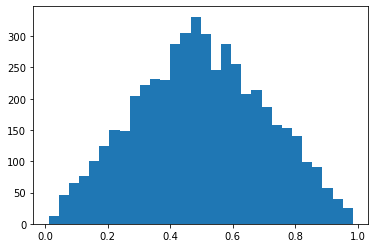

In [4]:
n = 2
sample = np.random.uniform(0, 1, size=(5000, n))
mean = sample.mean(axis=1)
plt.hist(mean, bins=30)

### Доверительные интервалы
Иногда мы хотим не только оценить среднее выборки, но и понять в каком интервале это значение может меняться с заданным уровнем значимости.

Например, мы знаем историю по продажам магазина за год и хотим узнать сколько в среднем продаж в месяц совершает магазин.

Помимо самого числа нам хотелось бы знать с вероятностью, например, 95%, в каком интервале может меняться это значение.

В этом нам поможет центральная предельная теорема.

Мы уже знаем, что если брать из генеральной совокупности выборки размера n, то выборочное среднее всех этих выборок будет распределяться по нормальному закону. 

Мы так же знаем, что 95% всех наблюдений будут лежать в диапазоне +-1.96 $\sigma$ по правилу трех сигм

Выборки разного размера могут дают разные оценки параметров генеральной совокупности. Для характеристики точности выборочных оценок используют **стандартную ошибку среднего**

Стандартная ошибка среднего вычисляется по формуле

$$\text{SE}_{\bar {x}}\ ={\frac {\sigma }{\sqrt {n}}}$$

Внимание! Стандартная ошибка среднего не является характеристикой разброса значений. Стандартная ошибка среднего лишь говорит о том, как точно мы оцениваем среднее генеральной совокупности по выборке. Чем больше выборка, тем меньше это значение

Доверительный интервал расчитывается по формуле:

$$(\bar{x} - 1.96 SE_{\bar{x}} ; \bar{x} + 1.96 SE_{\bar{x}})$$

если у кого-то возник вопрос, почему 1,96 и 2,58, то простой ответ - из таблиц. Нет, 1,96 это не просто "недоокругленные" 2 сигмы, и 2,58 это не "недоокругленные" 3 сигмы. Т.е. надо запомнить:
1. для расчета 95% доверительного интервала используйте 1,96,
2. для расчета 99% доверительного интервала используйте 2,58.

In [5]:
mean = 100
std = 10 # Настоящее среднеквадратичное отклонение, но представим, что мы его посчитали из данных
alpha = 0.05
n = 12

### Вариант 1. Настоящая дисперсия известна
Настоящая дисперсия может быть известна, если мы проверили статистическую гипотезу и доказали это.

Оценка получится довольно точной

In [6]:
from scipy.stats import norm

def get_confidence_interval(mean, std, n, alpha):
    h = norm.ppf(1 - alpha / 2) * std / np.sqrt(n)
    return mean - h, mean + h

confidence_interval = get_confidence_interval(mean, std, n, alpha)

confidence_interval

(94.34207132961915, 105.65792867038085)

### Вариант 2. Настоящая дисперсия неизвестна
Здесь std - среднеквадратичное отклонение, которое мы могли посчитать по данным

Оценка получится менее точной

In [7]:
from scipy.stats import t

t.interval(1 - alpha, n - 1, loc=mean, scale=std / np.sqrt(n))

(93.64630312671869, 106.35369687328131)

В этом случае мы используем T-распределение Стьюдента, которое похоже на нормальное распределение.

![student_t_distr.png](../images/student_t_distr.png)

На картинке параметр  - количество степеней свободы распределения. Если устремим к бесконечности, то получим нормальное распределение.


## Проверка гипотез

Если у нас есть выборка, мы можем проверять, что ее характеристика будет равна константе.

Если у нас есть две выборки, то можем сравнивать их между собой.

На матстате подробно рассказывают про разные критерии, условия их применимости и тд, сегодня мы очень упрощенно по этому пройдемся.

### Алгоритм проверки статистических гипотез:

1. Формулируем гипотезы H0 и H1
2. Выбираем уровень значимости
3. Определяем статистический критерий
4. Рассчитываем критерий
5. Принимаем решение


Цель тестирования состоит в том, чтобы выяснить, может ли наблюдаемый эффект вызываться случайно.
### Шаг 1. Формулируем гипотезы

Обычно формулируются две взаимоисключающие гипотезы. 

Гипотеза $H_0$ принимается за базовую (как было до нашего вмешательства, например). Альтернативная гипотеза $H_1$ показывает то, чего мы хотим достичь или что хотим доказать. 

Основные статистические тесты придумали до нас, нам остается только их правильно применить и не допустить ошибок в интерпретации.

Например:

- $H_0$: матожидание величины $F$ равно $a$
- $H_1$: матожидание $\neq$ $a$ ИЛИ > $a$ ИЛИ < $a$

Или:

- $H_0$: Распределение $G$ - нормальное
- $H_1$: Распределение принадлежит другому классу

Или:

- $H_0$: изменение цвета кнопки не повлияло на действия пользователя
- $H_1$: изменение цвета кнопки изменило количество кликов по ней

Или:

- $H_0$: новое лекарство не влияет на выздоровление пациентов
- $H_1$: с новым лекарством люди выздоравливают от болезни $X$ быстрее

Гипотезы бывают односторонними и двусторонними. 

Двусторонние гипотезы более широко распространены в статистике, поскольку, как правило, необходимо обнаружить различия любой направленности.

Нулевая гипотеза — утверждение, что ничего особенного не произошло, и любой эффект, который наблюдается, происходит в силу случайности.

Тестирование гипотезы предполагает, что нулевая гипотеза является истинной и проверяет, является ли наблюдаемый эффект разумным результатом.

После сбора данных и вычисления статистик можно принять одно из двух решений:
- отвергнуть нулевую гипотезу;
- не отвергнуть нулевую гипотезу.

Не отвержение нулевой гипотезы не означает ее справедливости.

### Шаг 2. Выбираем уровень значимости

Насколько мы хотим быть уверены в результатах теста?

Уровень значимости - вероятность получить ложно-положительный результат (ошибку 1 рода).

Обычно берут уровень значимости 0.05, и это некий стандарт (вам поверят, что ваш метод работает), но для каждой задачи надо выбирать свой уровень значимости. В крупных компаниях стандарт для АБ-тестов - несколько нулей после запятой


### Шаг 3. Определяем статистический критерий

Существует множество статистических критериев, которые позволяют оценить по данным эксперимента его результат.

Критерий выбирается от задачи, их существует большое множество, [на википедии можно посмотреть самые основные](https://ru.wikipedia.org/wiki/Статистический_критерий)

Скорее всего, нужный вам критерий есть в scipy.

Если в scipy нет нужного критерия, то он есть в другой библиотеке

### Шаг 4. Рассчитываем критерий

Находим критическую область, находим значение статистического критерия для наших данных

![critical_area.png](../images/critical_area.png)

### Ошибки I и II рода
Существует два типа ошибок - ошибки первого и второго рода.

Уровень значимости - вероятность не допустить ошибку первого рода

Какую ошибку "можно" допустить, а какую нельзя?


<div>
<img src="../images/type_error.jpg" width="600"/>
</div>
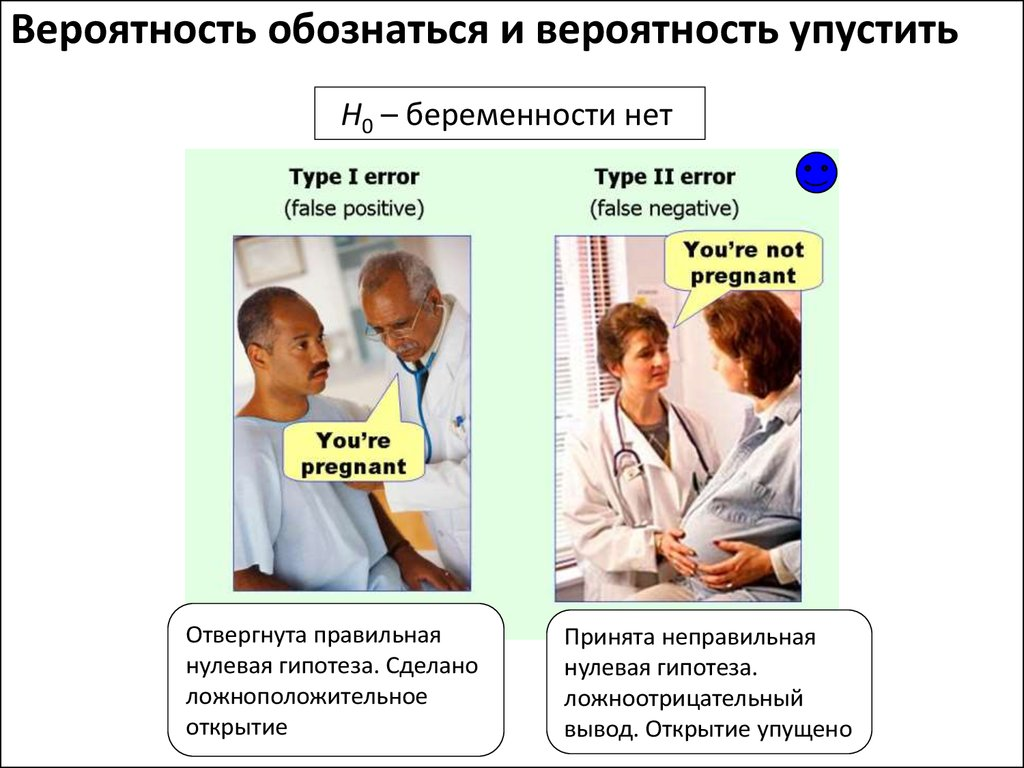

## Проверка на нормальность
Проверить распределение на нормальность можно многими способами. Например, при помощи статистических тестов (их существует очень много, но чаще всего используют критерий Шапиро)

Также используют QQ-график (qq plot). Это неформальный тест, но очень наглядный. Если график похож на линию  𝑦=𝑥 , то выборка из нормального распределение. Если график не похож на прямую линию, то распределение не нормальное.

## Полезные ссылки
- [Первая часть статистики на stepic](https://stepik.org/course/76/)
- [Вторая часть статистики на stepic](https://stepik.org/course/524/)
- [Третья часть статистики на stepic](https://stepik.org/course/2152/syllabus)
- [Книга "Статистика и Котики"](http://info.levandovskiy.info/wp-content/uploads/2018/10/Statistika_i_kotiki.pdf)
- [Книга "Как лгать при помощи статистики"](https://baguzin.ru/wp/wp-content/uploads/2015/09/Дарелл-Хафф.-Как-лгать-при-помощи-статистики.pdf)